# 9逻辑回归 Logistic Regression

## 9.1 概述

### 9.1.1 介绍
#### 解决问题
逻辑回归：解决分类问题

##### 问题
对于给定的样本数据集X，y，我们如何找到参数theta，使得用这样的方式，可以最大程度获得样本数据集X对应的分类输出y？

#### 如何理解
* 回归问题怎么解决分类问题？
* 将样本的特征和样本发生的概率联系起来，概率是一个数

##### 详细解释
回归问题(y为预测值）=>$ \hat{y}=f(x) $ 
逻辑回归预测概率：$ \hat{p}=f(x) \qquad  \hat{y} =  \left\{\begin{aligned}1,\quad \hat{p} ≥ 0.5 \\0,\quad  \hat{p} ≤ 0.5\end{aligned}\right. $

##### 总结
* 逻辑回归既可以看作是回归算法，也可以看做是分类算法
* 通常作为分类算法用，只可以解决二分类问题


#### 公式
* 公式转变 $ \hat{y}=f(x) $  => $ \hat{y}= \theta^T \cdot x_b $ 
* 前者值域(-infinity, + infinity) => 后者为概率，值域为[0, 1]

$ \hat{p}= \sigma(\theta^T \cdot x_b) $ 

### 9.1.2 Sigmoid函数
* 值域(0,1): t>0时，p>0.5  t<0时，p<0.5
$$  \hat{p}= \sigma(\theta^T \cdot x_b) = \frac{1}{1+e^{-\theta^T \cdot x_b}} $$

最终公式
$$ \hat{y} = \left\{\begin{aligned}1,\quad \hat{p} ≥ 0.5 \\ 0,\quad  \hat{p} ≤ 0.5\end{aligned}\right.  $$

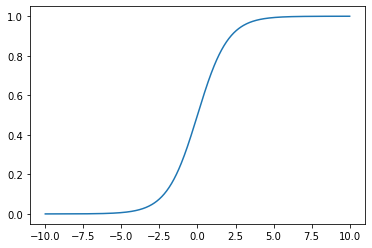

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

x = np.linspace(-10,10,500)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

## 9.2 逻辑回归的损失函数
### 9.2.1 单个样例损失公式
$$  \hat{p}= \sigma(\theta^T·x_b) = \frac{1}{1+e^{-\theta^T·x_b}} $$
$$ \hat{y} = \left\{\begin{aligned}1,\quad \hat{p} ≥ 0.5 \\0,\quad  \hat{p} ≤ 0.5\end{aligned}\right. \quad  cost = \left\{\begin{aligned} 如果y=1，p越小， cost越大 \\ 如果y=0，p越大， cost越大\end{aligned}\right.$$


$$ cost = \left\{\begin{aligned} -log(\hat{p}) \quad if \quad y=1 \\ -log(1 - \hat{p}) \quad if \quad y=0 \end{aligned}\right. $$
$$ cost = -ylog(\hat{p}) - (1-y)log(1-\hat{p}) $$

### 9.2.2 损失函数
$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^m y^{(i)}log(\hat{p}^{(i)}) + (1 - y^{(i)})log(1-\hat{p}^{(i)}) $$

$$  \hat{p}^{(i)}= \sigma(X_b^{(i)}\theta^T) = \frac{1}{1+e^{-X_b^{(i)}\theta^T}} $$

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^m y^{(i)}log(\sigma(X_b^{(i)}\theta)) + (1 - y^{(i)})log(1 - \sigma(X_b^{(i)}\theta)) $$

没有公式解，只能使用梯度下降法求解

## 9.3 逻辑回归损失函数的梯度

### 9.3.1 损失函数
$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^m y^{(i)}log(\sigma(X_b^{(i)}\theta)) + (1 - y^{(i)})log(1 - \sigma(X_b^{(i)}\theta)) $$

$$ \nabla{J(θ)}=
\left\{
 \begin{matrix}
   \frac{\alpha{J(\theta)}}{\alpha\theta_0} \\
   \frac{\alpha{J(\theta)}}{\alpha\theta_1} \\
   \cdots \\
   \frac{\alpha{J(\theta)}}{\alpha\theta_n} \\
  \end{matrix} 
\right\}
$$

$$ \sigma(t)  = \frac{1}{1 + e^{-t}} = (1 + e^{-t})^{-1} \quad \sigma(t)\prime  = -(1 + e^{-t})^{-2}\cdot e^{(-t)} \cdot(-1) = (1 + e^{-t})^{-2}\cdot e^{(-t)}$$

$$ (log\sigma(t))\prime = \frac{1}{\sigma(t)}\cdot\sigma(t)\prime = \frac{1}{\sigma(t)}\cdot (1 + e^{-t})^{-2}\cdot e^{(-t)} = \frac{1}{(1 + e^{(-t)})^{-1}}\cdot(1 + e^{-t})^{-2}\cdot e^{-t} = (1+e^{-t})^{-1}\cdot e^{-t}  $$


$$ \sigma(t) = (1 + e^{-t})^{-2}\cdot e^{(-t)} $$
$$ (log\sigma(t))\prime = (1+e^{-t})^{-1}\cdot e^{-t} = \frac{e^{-t}}{1 + e^{-t}} =  \frac{1 + e^{-t} - 1}{1 + e^{-t}} = 1- \frac{1}{1 + e^{-t}} =  1 - \sigma(t)$$

### 9.3.2 整体求导




$$ \frac{\mathrm{d}(y^{(i)}\log\sigma(X_b^{(i)}\theta))}{\mathrm{d}\theta_j} = y^{(i)}(1 - \sigma(X_b^{(i)}\theta))\cdot X_j^{(i)}$$

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^m y^{(i)}log(\sigma(X_b^{(i)}\theta)) + (1 - y^{(i)})log(1 - \sigma(X_b^{(i)}\theta)) $$

$$ \sigma(t) = (1 + e^{-t})^{-1} \quad \sigma(t)\prime  = (1 + e^{-t})^{-2}\cdot e^{-t}$$

$$ (log(1 - \sigma(t)))\prime =  \frac{1}{1 - \sigma(t)}\cdot(-1)\cdot\sigma(t)\prime = -\frac{1}{1 - \sigma(t)}\cdot (1 + e^{-t})^{-2}\cdot e^{-t}$$

$$ -\frac{1}{1 - \sigma(t)} = \frac{1}{\frac{1 + e^{-t}}{1 + e^{-t}} - \frac{1}{1 + e^{-t}}} = -\frac{1 + e^{-t}}{e^{-t}}$$


$$ (log(1 - \sigma(t)))\prime = -\frac{1}{1 - \sigma(t)}\cdot (1 + e^{-t})^{-2}\cdot e^{-t} =  -\frac{1 + e^{-t}}{e^{-t}} \cdot (1 + e^{-t})^{-2}\cdot e^{-t}  = -(1 + e^{-t})^{-1} = -\sigma(t)$$


$$ \frac{\mathrm{d}(y^{(i)}\log\sigma(X_b^{(i)}\theta))}{\mathrm{d}\theta_j} = y^{(i)}(1 - \sigma(X_b^{(i)}\theta))\cdot X_j^{(i)} $$



$$ \frac{\mathrm{d}(1-y^{(i)})\log(1 - \sigma(X_b^{(i)}\theta)))}{\mathrm{d}\theta_j} = (1-y^{(i)})(-\sigma(X_b^{(i)}\theta))\cdot X_j^{(i)} $$


$$ J(\theta) = y^{(i)}X_j^{(i)} - y^{(i)}\sigma(X_b^{(i)}\theta))\cdot X_j^{(i)} - \sigma(X_b^{(i)}\theta))\cdot X_j^{(i)} + y^{(i)}\sigma(X_b^{(i)}\theta))\cdot X_j^{(i)}  = y^{(i)}X_j^{(i)} -  sigma(X_b^{(i)}\theta))\cdot X_j^{(i)} = (y^{(i)} -  sigma(X_b^{(i)}\theta))\cdot X_j^{(i)}$$

$$ \frac{J(\theta)}{\theta_j} = \frac{1}{m}\sum_1^M(\sigma(X_b^{(i)}\theta) - y^{(i)})X_j^{(i)} $$


$$ \nabla{J(\theta)}=
\left\{
 \begin{matrix}
   \frac{\alpha{J(\theta)}}{\alpha\theta_0} \\
   \frac{\alpha{J(\theta)}}{\alpha\theta_1} \\
   \frac{\alpha{J(\theta)}}{\alpha\theta_2} \\
   \cdots \\
   \frac{\alpha{J(\theta)}}{\alpha\theta_n} \\
  \end{matrix} 
\right\}=
\left\{
 \begin{matrix}
   \sum_1^m(\sigma(X_b^{(i)}\theta) - y^{(i)})  \\
   \sum_1^m(\sigma(X_b^{(i)}\theta) - y^{(i)})\cdot X_1^{(i)}  \\
   \sum_1^m(\sigma(X_b^{(i)}\theta) - y^{(i)})\cdot X_2^{(i)}  \\
   \cdots \\
   \sum_1^m(\sigma(X_b^{(i)}\theta) - y^{(i)})\cdot X_n^{(i)}  \\
  \end{matrix} 
\right\}
=\frac{1}{m}
\left\{
 \begin{matrix}
   \sum_1^m(\hat{y}^{(i)} - y^{(i)})  \\
   \sum_1^m(\hat{y}^{(i)} - y^{(i)})\cdot X_1^{(i)}\\
   \sum_1^m(\hat{y}^{(i)} - y^{(i)})\cdot X_2^{(i)}\\
   \cdots \\
   \sum_1^m(\hat{y}^{(i)} - y^{(i)})\cdot X_n^{(i)}\\
  \end{matrix} 
\right\}
=\frac{1}{m}\cdot X_b^T\cdot(\sigma(X_b\theta) - y)
$$


## 9.4 实现逻辑回归算法

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

X.shape

(100, 2)

In [3]:
y.shape

(100,)

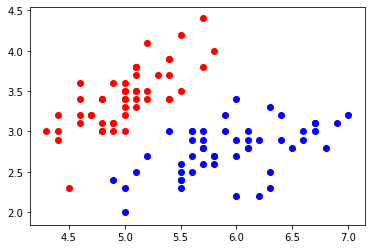

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

### 9.4.1 使用逻辑回归

In [5]:
%run model_selection.py
%run LogisticRegression.py

In [6]:
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

from LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.score(X_test, y_test)

1.0

In [8]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.01685947, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [9]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [10]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## 9.5 决策边界
### 9.5.1 概述
* 决策边界 $\theta^T\cdot x_b = 0$
* 如果X有两个特征 $ \theta_0 + \theta_1x_1 + \theta_2x_2 = 0$
$$ x_2 = \frac{-\theta_0 - \theta_1x_1}{\theta_2}$$

In [11]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

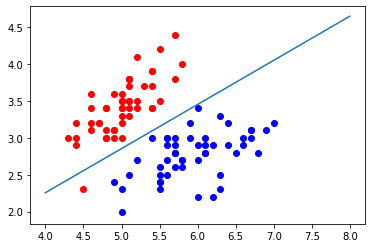

In [12]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

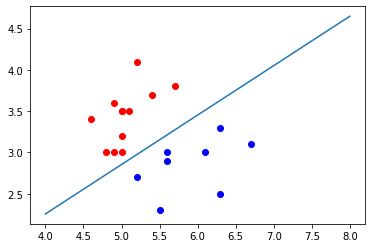

In [13]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

### 9.5.2 不规则的决策边界的绘制方法

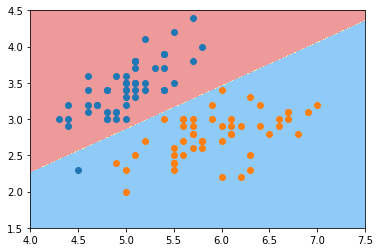

In [14]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### kNN的决策边界

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
knn_clf.score(X_test, y_test)

1.0

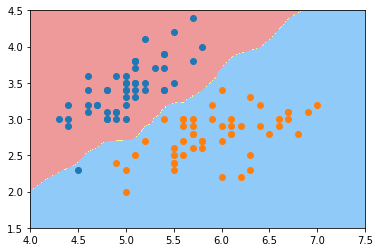

In [17]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [18]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

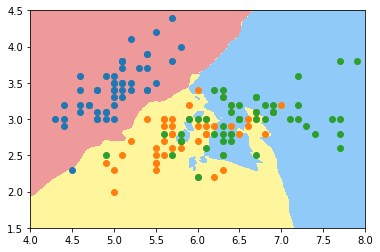

In [19]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

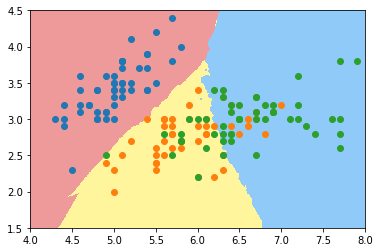

In [20]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0,0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1,0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2,0], iris.data[iris.target==2,1])
plt.show()

## 9.5 在逻辑回归中使用多项式特征

In [21]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1]**2)<1.5, dtype='int')

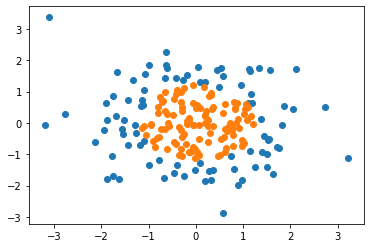

In [22]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 9.5.1 使用逻辑回归

In [23]:
%run LogisticRegression.py

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [25]:
log_reg.score(X, y)

0.605

In [26]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

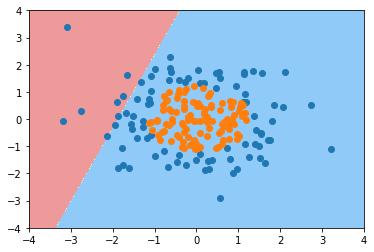

In [27]:
plot_decision_boundary(log_reg, axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [29]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

In [30]:
poly_log_reg.score(X, y)

0.95

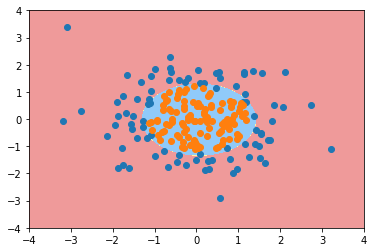

In [31]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [32]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

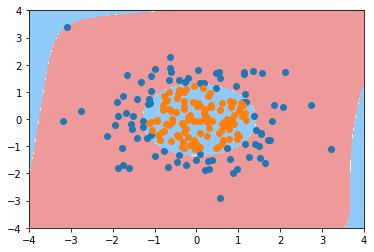

In [33]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 9.7 scikit-learn中的逻辑回归

### 9.7.1 逻辑回归中使用正则化
#### 整体的损失函数
$$ J(\theta) + \alpha L_2 \quad C\cdot J(\theta) + L2$$
$$ J(\theta) + \alpha L_1 \quad C\cdot J(\theta) + L1$$

* scikit-learn中使用的方式$ C\cdot J(\theta) + L2$ 

In [34]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array((X[:,0]**2+X[:,1])<1.5, dtype='int')
for _ in range(20):
    y[np.random.randint(200)] = 1

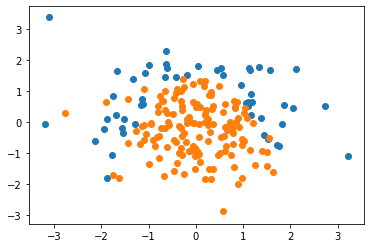

In [35]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 9.7.2 使用scikit-learn中的逻辑回归

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [39]:
log_reg.score(X_test, y_test)

0.86

In [40]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

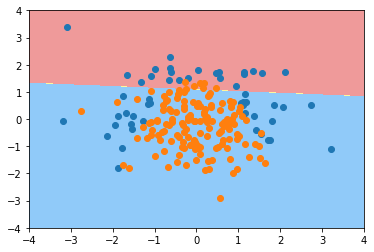

In [41]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [43]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [44]:
poly_log_reg.score(X_train, y_train)

0.9066666666666666

In [45]:
poly_log_reg.score(X_test, y_test)

0.94

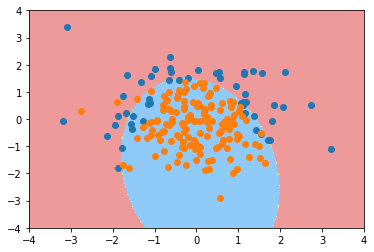

In [46]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [47]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [48]:
poly_log_reg2.score(X_train, y_train)

0.94

In [49]:
poly_log_reg2.score(X_test, y_test)

0.92

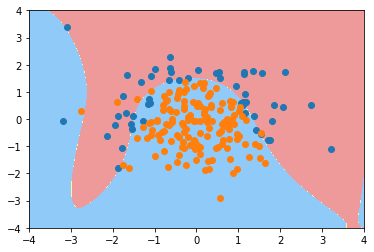

In [50]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [51]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [52]:
poly_log_reg3.score(X_train, y_train)

0.84

In [53]:
poly_log_reg3.score(X_test, y_test)

0.92

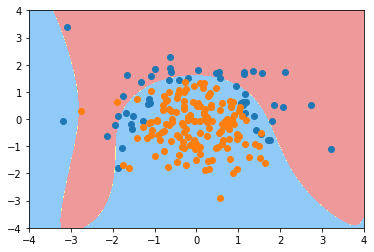

In [54]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 9.8 OvR与OvO
### 9.8.1 概述
#### 逻辑回归只可以解决二分类问题
解决多分类问题：
* OvR
* OvO

#### OvR（One vs Rest）
一对剩余的所有

#### OvO（One vs One）
一对一

### 9.8.2 实例

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [57]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
log_reg.score(X_test, y_test)

0.7894736842105263

In [59]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

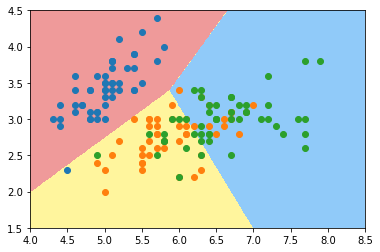

In [60]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [61]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

0.7894736842105263

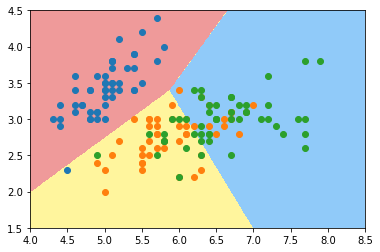

In [62]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

#### 使用所有的数据

In [63]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [64]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

In [65]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

#### OvO and OvR

In [66]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9736842105263158

In [67]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0